<a href="https://colab.research.google.com/github/EmmaMo0306/Test/blob/main/SeabornDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
forecasts = pd.read_csv("all_opcos.csv")

FileNotFoundError: ignored

# New Section

In [ ]:
forecasts = forecasts.query("`Entity Default` != 'Randstad USA'") 
forecasts = forecasts.astype({"DATE_VALUE":"datetime64"})
forecasts = forecasts.query("DATE_VALUE > '2018-02-01'")

In [ ]:

sns.relplot??

(array([736695., 736876., 737060., 737241., 737425., 737607., 737791.,
        737972.]), <a list of 8 Text major ticklabel objects>)

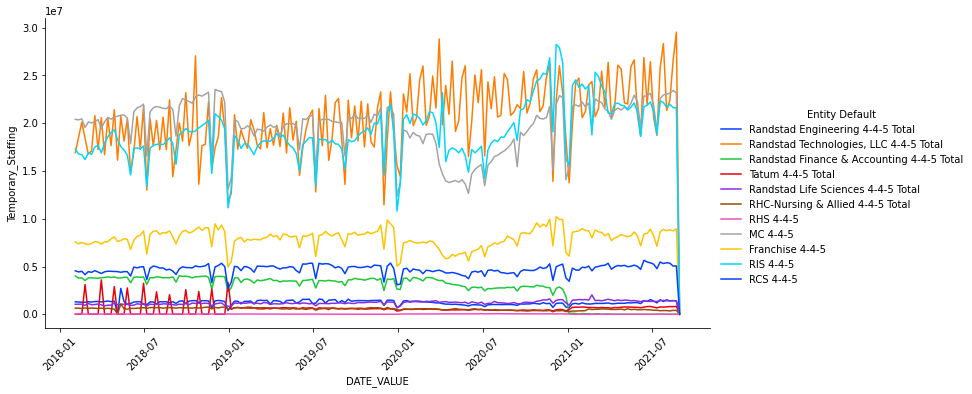

In [ ]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("bright", n_colors=forecasts["Entity Default"].nunique())

# Plot the lines on two facets
sns.relplot( data=forecasts, x="DATE_VALUE", y="Temporary_Staffing", hue="Entity Default", kind="line", palette=palette, height=5, aspect=2.0, facet_kws=dict(sharex=False), )
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Effects of COVID by Entity')

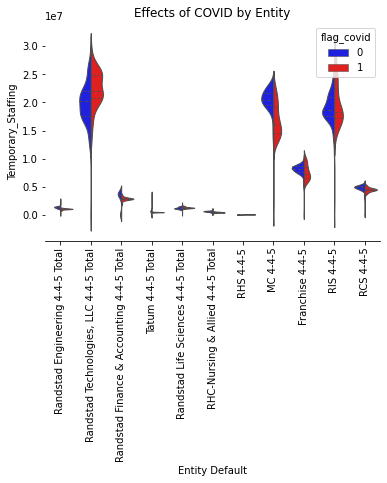

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=forecasts, x="Entity Default", y="Temporary_Staffing", hue="flag_covid",
               split=True, inner="quart", linewidth=1,
               palette={1: "r", 0: "b"})
sns.despine(left=True)
plt.xticks(rotation=90)
plt.title("Effects of COVID by Entity")

In [ ]:
mc = forecasts.query("`Entity Default`=='MC 4-4-5'")
x, y = mc["Temporary_Staffing"], mc["Active_Customers"]


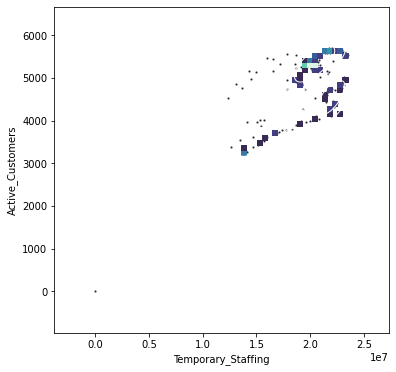

In [ ]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

In [ ]:
forecasts = forecasts.sort_values(by=["Entity Default", "DATE_VALUE"])
forecasts["pct"] = forecasts.Temporary_Staffing.diff().shift(-1)/forecasts.Temporary_Staffing
forecasts["Month"] = forecasts.DATE_VALUE.dt.month.astype(str).str.pad(2, side="left", fillchar="0")
forecasts["Year"] = forecasts["DATE_VALUE"].dt.year.astype(str)
forecasts["YearMonth"] = forecasts["Year"] + "-" + forecasts["Month"]
forecasts_monthly = forecasts.groupby(["Entity Default", "YearMonth"])[["pct"]].mean().reset_index().query("pct < 1.0 & pct > -1.0").pivot("YearMonth", "Entity Default", "pct")

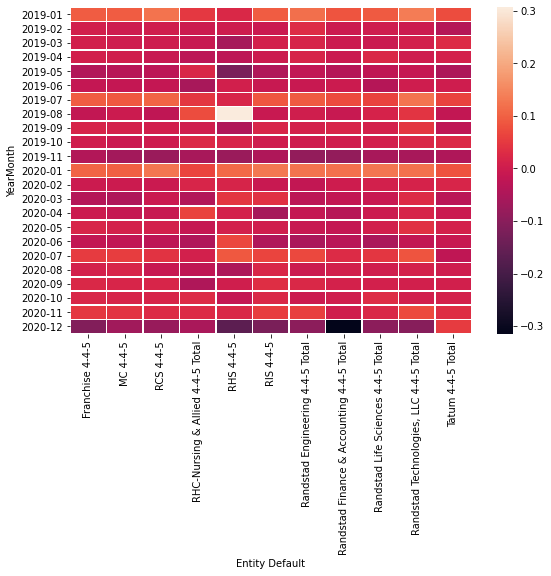

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(forecasts_monthly.dropna(), annot=False, linewidths=.5, ax=ax)
# plt.savefig("report.png")